# Module 15 - Gradient Descent
**Author** - Jacob Buysse

* This notebook will explore the math behind Gradient Descent with the application of Linear Regression.
* We will be training a model to predict the house price given some spatial features of the house.
* We will compare several learning rates
* We will compare the performance of our algorithm to the public libraries.

In this notebook we will be using the following libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Let us configure our graphs for font size, high DPI, and automatic layout.

In [2]:
matplotlib.rc('axes', labelsize=16)
matplotlib.rc('figure', dpi=150, autolayout=True)

## Dataset

We were sent a csv containing 100 samples with house price predictions.
* There are 100 samples.
* There are 3 features (f1, f2, f3) - all numeric.
    * NOTE: The features are not scaled.
* There is a price (the value to predict).

In [3]:
df = pd.read_csv(
    './multi_feature_dataset_100_samples.csv',
    header=None,
    delimiter=',',
    names=['f1', 'f2', 'f3', 'price']
)
df['bias'] = 1
df

,f1,f2,f3,price,bias
0,1444,5,18,477070.0,1
1,2742,5,1,811520.0,1
2,1413,1,9,317930.0,1
3,2838,1,4,634030.0,1
4,1977,3,14,511670.0,1
...,...,...,...,...,...
95,1893,4,42,482750.0,1
96,2601,4,7,653950.0,1
97,1040,2,19,319150.0,1
98,2145,2,46,437590.0,1


## Data Visualizations

Let us visualize our input data so we can see what we are dealing with.

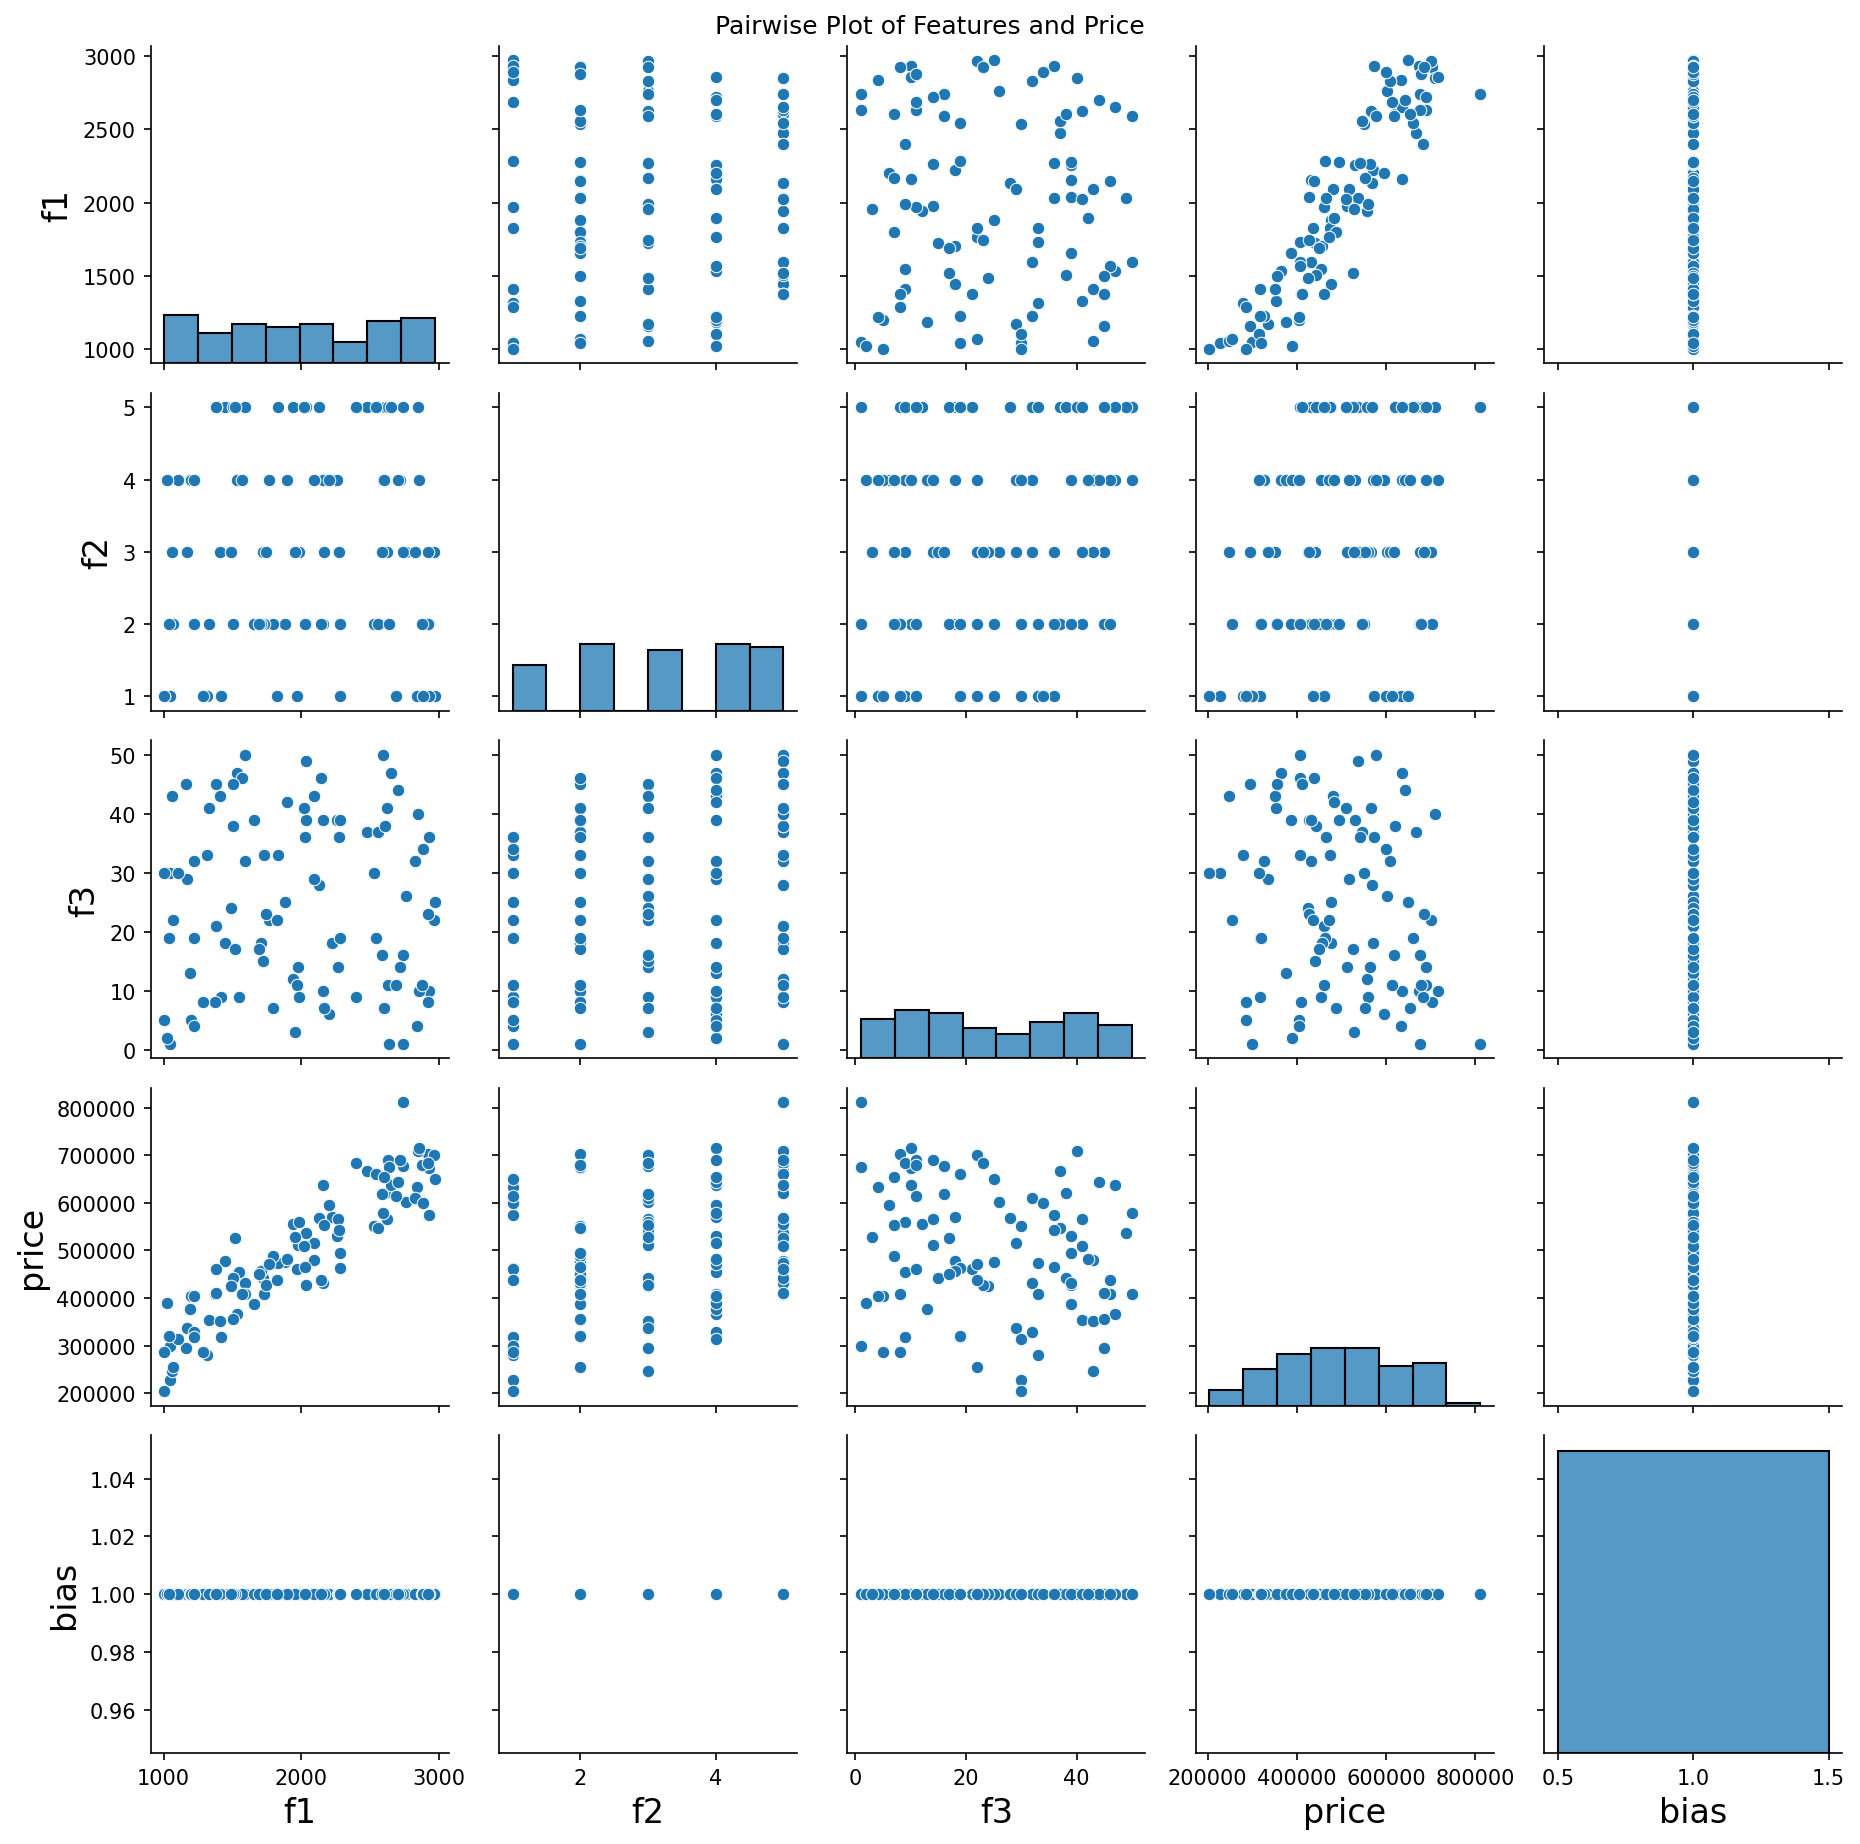

In [4]:
plot = sns.pairplot(df)
plot.fig.suptitle('Pairwise Plot of Features and Price')
plt.tight_layout()
plt.show()

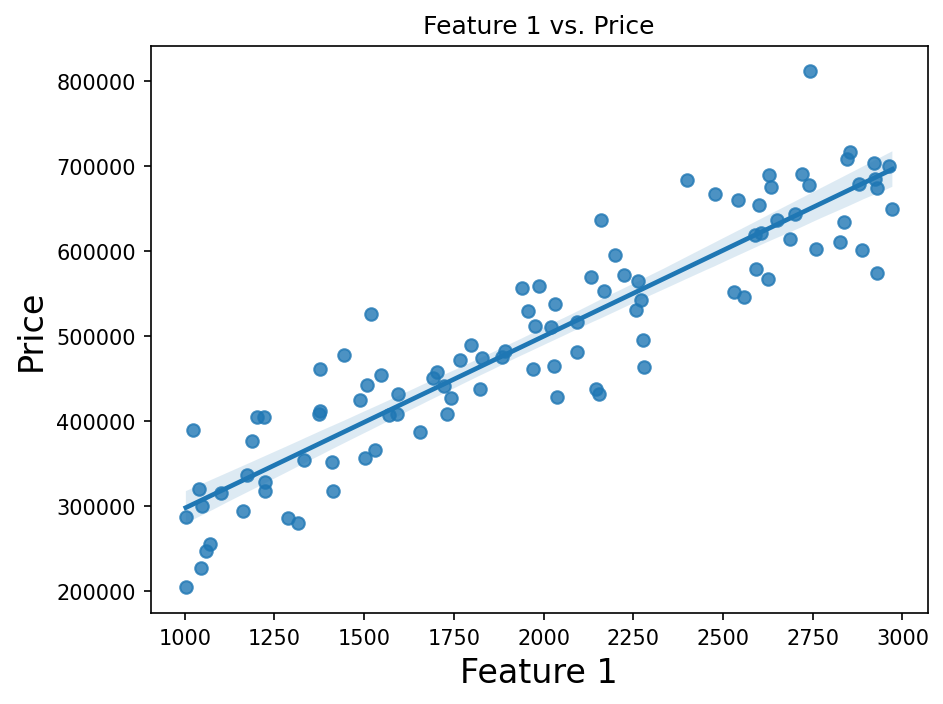

In [5]:
plot = sns.regplot(x=df.f1, y=df.price)
plot.set(title='Feature 1 vs. Price', xlabel='Feature 1', ylabel='Price')
plt.show()

We can see a very strong linear relationship between feature 1 and the price.

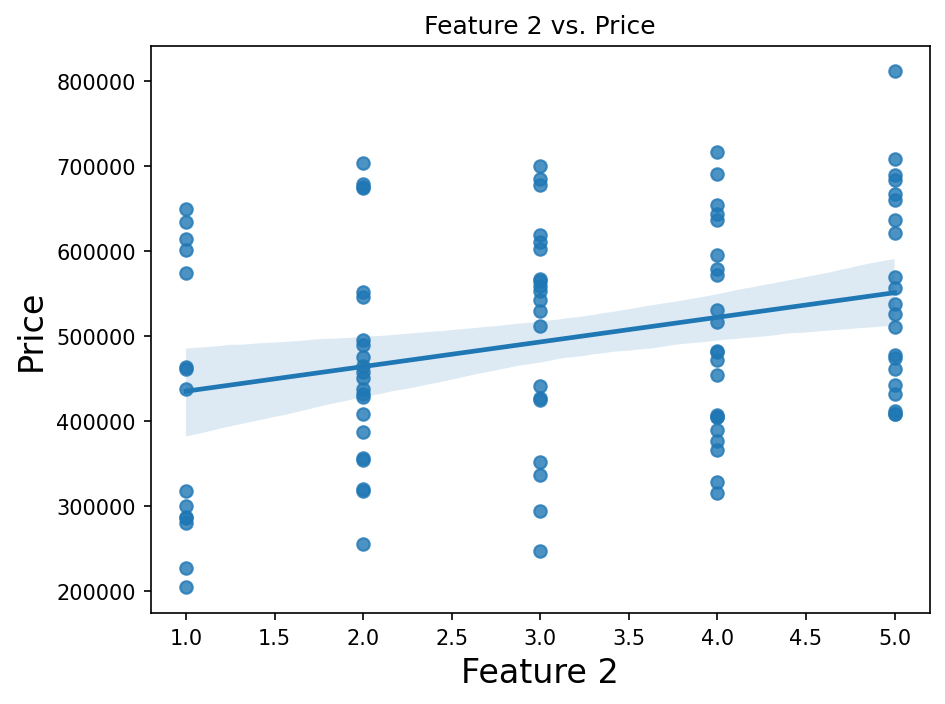

In [6]:
plot = sns.regplot(x=df.f2, y=df.price)
plot.set(title='Feature 2 vs. Price', xlabel='Feature 2', ylabel='Price')
plt.show()

There is much less of a linear relationship between feature 2 and price, but still a marginal one.

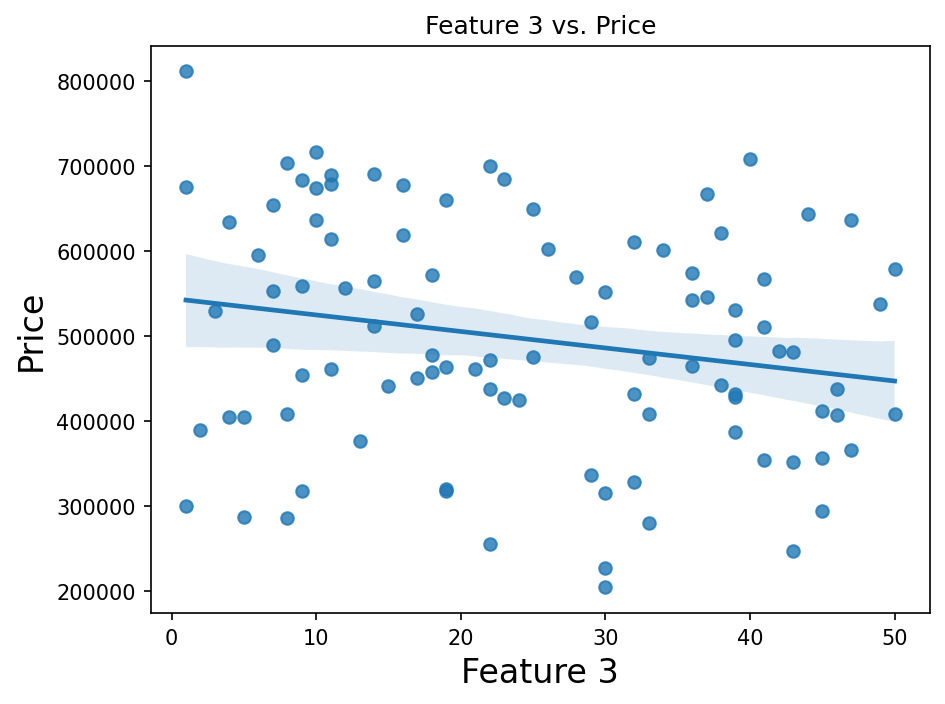

In [7]:
plot = sns.regplot(x=df.f3, y=df.price)
plot.set(title='Feature 3 vs. Price', xlabel='Feature 3', ylabel='Price')
plt.show()

There is very little correlation with feature 3 and price, but we can see a slightly negative relationship.

## Data Cleaning

* We will standardize the input features (centered at zero with standard deviation of +/- 1).
* We will add a column of 1s to account for the bias term (theta_0).

In [8]:
# We will be predicting the prices
y = df.price.values
sample_count = y.shape[0]
print(f"{sample_count} samples")

# Normalize the 3 features
X = df[['f1', 'f2', 'f3']].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# Add in a column of 1s for the bias term
X = np.hstack((np.ones((sample_count, 1)), X))
feature_count = X.shape[1]
print(f"{feature_count} features (including bias)")

100 samples
4 features (including bias)


## Gradient Descent

We will define our cost function, a helper for plotting the cost convergence over the iteration history, the gradient descent algorithm, and a helper for scoring the resulting predictions using the R2 score.

In [9]:
def GetCost(X, y, w):
    # Using MSE (Mean Squared Error) with the 1/2 factor for clean derivatives
    predictions = np.matmul(X,  w)
    errors = predictions - y
    m = len(y)
    return sum(np.square(errors)) / (2 * m)

In [10]:
def PlotHistory(history, alpha):
    plot = sns.lineplot(history)
    plot.set(title=f"Cost History during Gradient Descent (alpha={alpha})", xlabel='Iteration', ylabel='Cost')
    plt.show()

In [11]:
def GradientDescent(X, y, w, alpha, iterations):
    history = []
    for index in range(iterations):
        # Our predictions are just the product of our samples X times our weight vector
        predictions = np.matmul(X, w)
        # Our errors are the difference between our predictions and our truth values y
        errors = predictions - y
        # The gradient vector is the Jacobian matrix derivative of our cost
        # function with respect to the weights.  This comes out to the transpose
        # of X (n x m) times the errors (m x 1) to get an n x 1 vector that we
        # then scale down by the number of samples m.
        gradient = np.matmul(X.T, errors) / len(y)
        # Change the weights by the learning rate alpha times the gradient
        w = w - (alpha * gradient)
        # Determine the new cost
        cost = GetCost(X, y, w)
        # Keep track of the cost history so we can plot the progress of the algorithm
        history.append(cost)
    # Plot the cost history
    PlotHistory(history, alpha)
    # Return the final weights
    return w

In [12]:
def ComputeR2(true, pred):
    result = linregress(true, pred)
    rvalue = result.rvalue
    return rvalue * rvalue

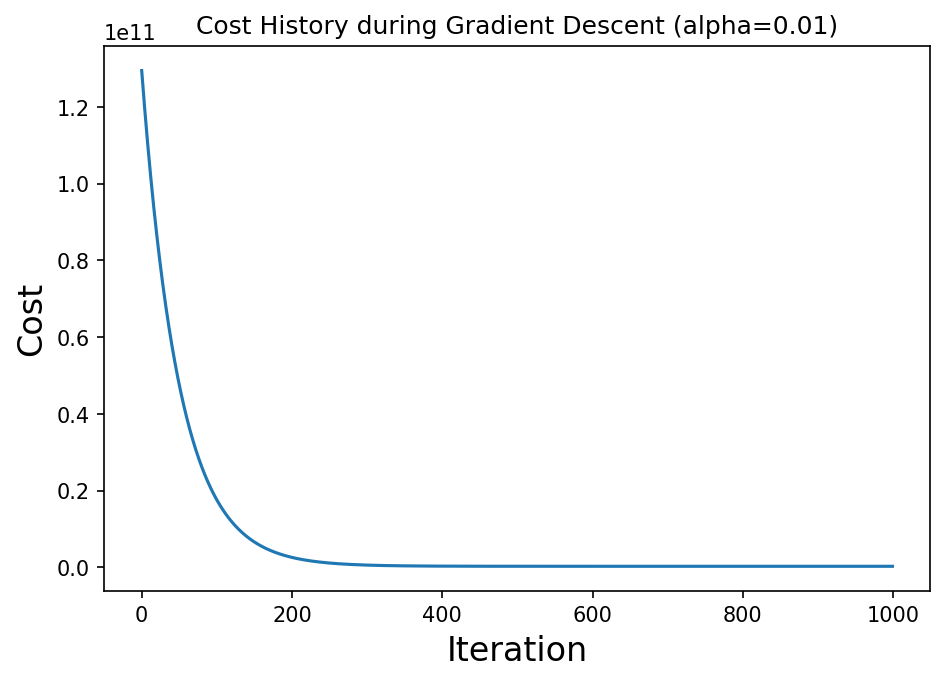

In [13]:
# Execute our algorithm starting with zero weights, a learning rate of 0.01, and iterating 1000 times
w = GradientDescent(X, y, np.zeros(feature_count), 0.01, 1000)

We can see that the cost history plot shows our cost function converging on 0 around 300 iterations.

In [14]:
print(f"Final weights: {w}")

Final weights: [496330.67186069 120604.67876542  40378.55089849 -30671.56417727]


In [15]:
# Show a predicted price to see how much we are in the ballbark
pred = np.matmul(X, w)
print(f"Predicted ${int(pred[0]):,}, actual ${int(y[0]):,}")

Predicted $458,378, actual $477,070


In [16]:
r2 = ComputeR2(y, pred)
print(f"R2 value for Gradient Descent model: {r2:.4f}")

R2 value for Gradient Descent model: 0.9688


## Other Hyperparameter Values

We will explore some other learning rate values and see how the cost function is affected.

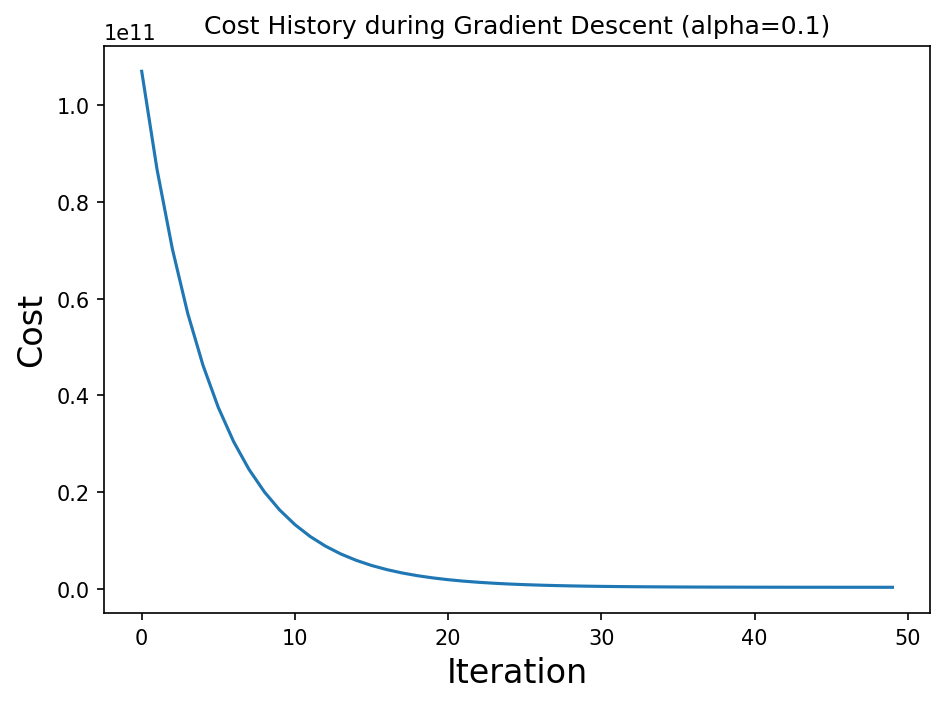

In [17]:
GradientDescent(X, y, np.zeros(feature_count), 0.1, 50);

We can see that a larger alpha was able to minimize the cost function much more quickly (done after 30 iterations).

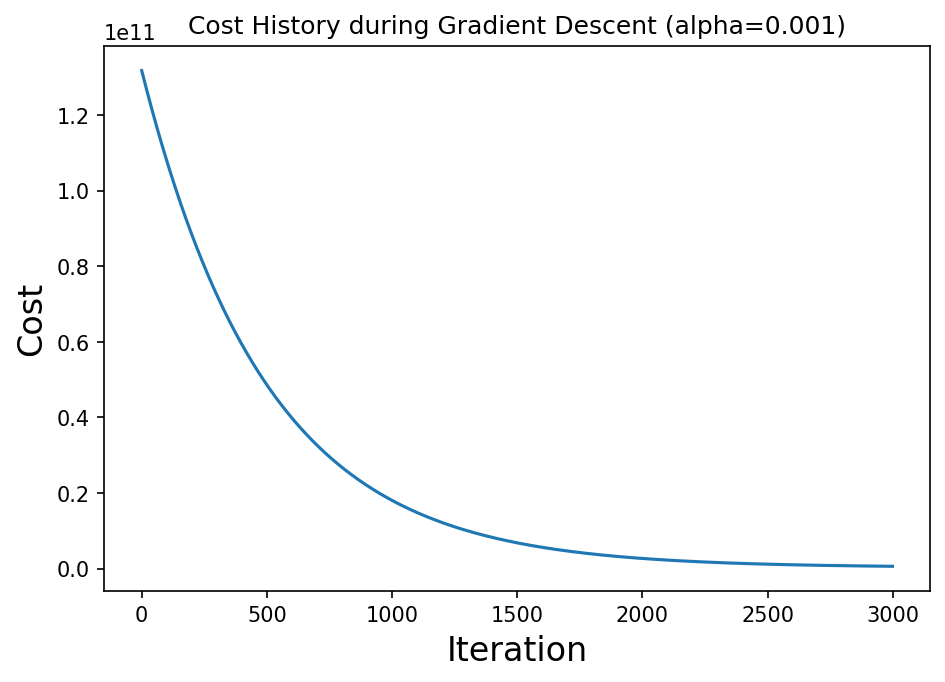

In [18]:
GradientDescent(X, y, np.zeros(feature_count), 0.001, 3000);

A smaller learning rate took closer to 3,000 iterations to converge.

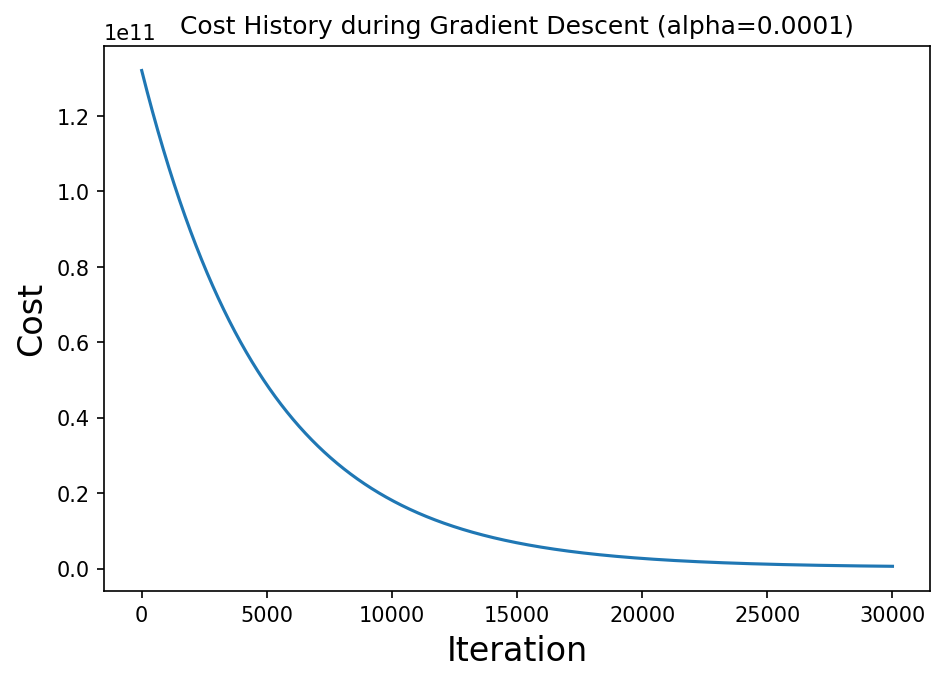

In [19]:
GradientDescent(X, y, np.zeros(feature_count), 0.0001, 30000);

And an even smaller learning rate than that took 30,000 iterations to converge.

## Compare against Library Function

We will use the scikit-learn `LinearRegression` model to compare our results.

In [20]:
model = LinearRegression(fit_intercept=False, n_jobs=-1)
model.fit(X, y)
print(f"Linear Regression parameters: {model.coef_}")

Linear Regression parameters: [496352.1        120608.64288837  40382.05113568 -30675.09868691]


The learned linear parameters are nearly identical to ours.

In [21]:
pred = model.predict(X)
print(f"Predicted ${int(pred[0]):,}, actual ${int(y[0]):,}")

Predicted $458,403, actual $477,070


In [22]:
r2 = ComputeR2(y, pred)
print(f"R2 value for LinearRegression model: {r2:.4f}")

R2 value for LinearRegression model: 0.9688
